# Cosmo-Learn Tutorial: Basic Usage

We demonstrate the basic functionalities of `cosmo_learn` for creating mock data (cosmic chronometers, supernovae, BAO, GWs, RSD-growth rates) and analyzing it using MCMC, GA, GP, BRR and ANN. See [arXiv:25xx.yyyzz](https://arxiv.org/abs/25xx.yyyzz) for more details.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from cosmo_learn.cosmo_learn import *

## 1. Mock data

Mock data in `cosmo_learn` (version 0.0.0) is based on existing data and a spatially-flat $w$CDM cosmology. Thus, to generate mock data or start an instance of `cosmo_learn` (let's call it `my_cl`), a set of fiducial cosmological parameters

$H_0$ (Hubble constant), $\Omega_{m0}$, $w$ (DE equation of state), and $S_8=\sigma_{8} \sqrt{\Omega_{m0}/0.3}$

 must be given as input. In this example, let's rely on the following fiducial cosmololy;

In [2]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

For reproducibility, users are encouraged to also utilize specifying a random seed, though the option `seed` when starting an instance. This is demonstrated in the following;

In [3]:
my_cl=CosmoLearn([H0, Om0, w0, s8], seed=14000605)

Now, let's make mock data.

### 1.1 Mock data in universe 14000605

To generate a data, users need to give a list of strings specific to each kind of data set they want to generate. The keys are given in the following example creating all data kinds available in `cosmo_learn`'s version 0.0.0.

Methods for visualizing the mock data sets are also available such as `show_mocks` (only mock data) and `show_mocks_and_residuals` (mock data and residuals). The residuals are obtained by relative to the fiducial cosmological model (input).

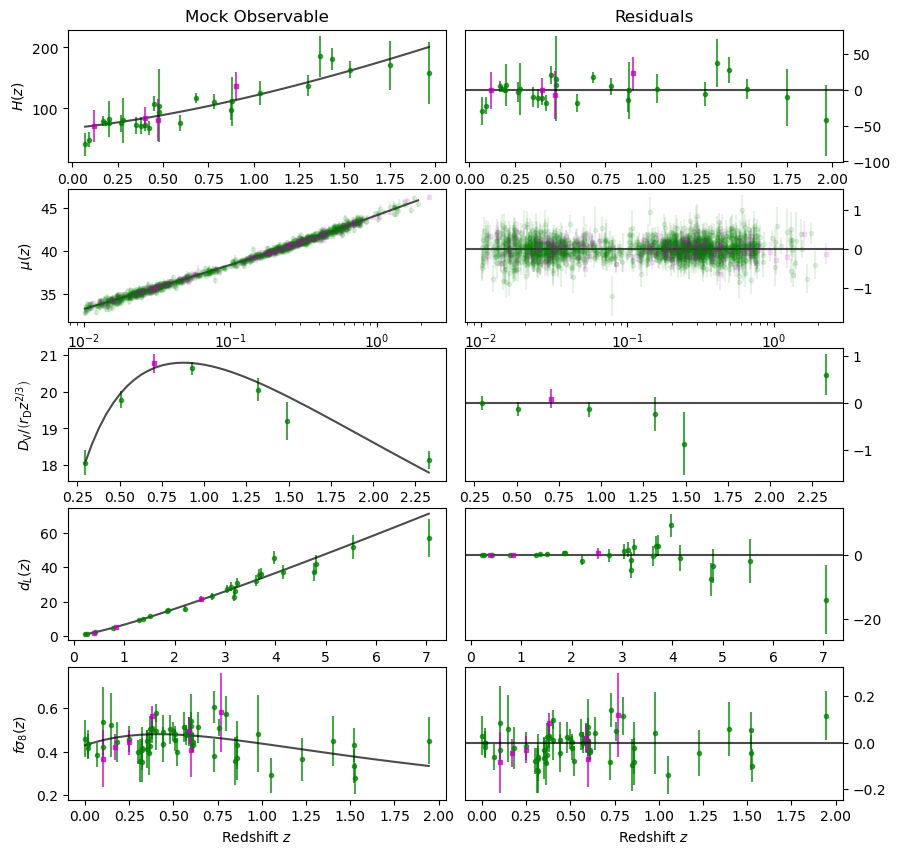

In [4]:
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cl.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cl.show_mocks_and_residuals(show_input=True, label_train=None, label_test=None)
fig.subplots_adjust(wspace=0.05)
plt.show()

Note that the mock data generated are already separated into a training set (gree circles) and a test set (pink rectangles) for later training. The markers shown can be changed by an option in `show_mocks` and `show_mocks_and_residuals`.

The created data sets (stored as a dictionary) can be directly accessed using the attribute `mock_data` such as;

In [5]:
my_cl.mock_data.keys()

dict_keys(['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', 'BrightSirens', 'RedshiftSpaceDistorsions'])

### 1.2 Multiple mocks with fixed random seed

Next line shows that fixing the random seed (or a universe) leads to the same data sets;

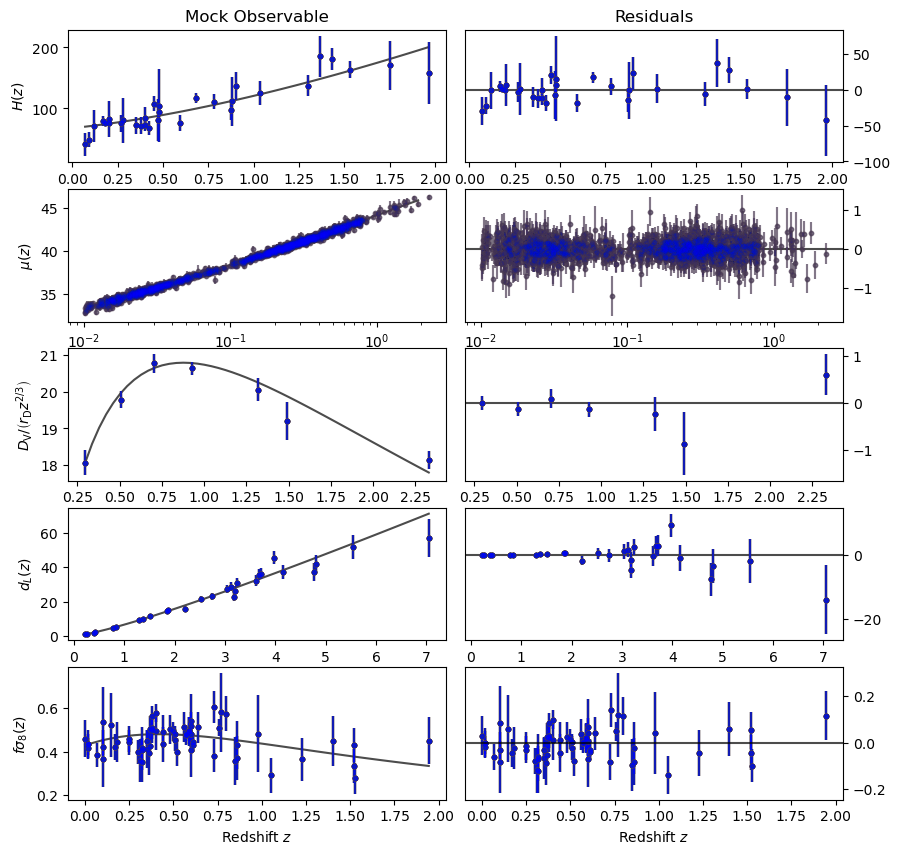

In [6]:
my_cl=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cl.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cl.show_mocks_and_residuals(show_input=True, fmt_train='go', fmt_test='go')
fig.subplots_adjust(wspace=0.05)

# loop with fixed random seed
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for rs in range(10):
    my_cl_rs=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
    my_cl_rs.make_mock(mock_keys=mock_keys)
    color = colors[rs % len(colors)]
    my_cl_rs.show_mocks_and_residuals(ax=ax, fmt_train=f'{color}o', fmt_test=f'{color}o')
plt.show()

### 1.3 Multiple mocks in different universes

In the next line, we show that different mock data sets are assigned with specific random seeds.

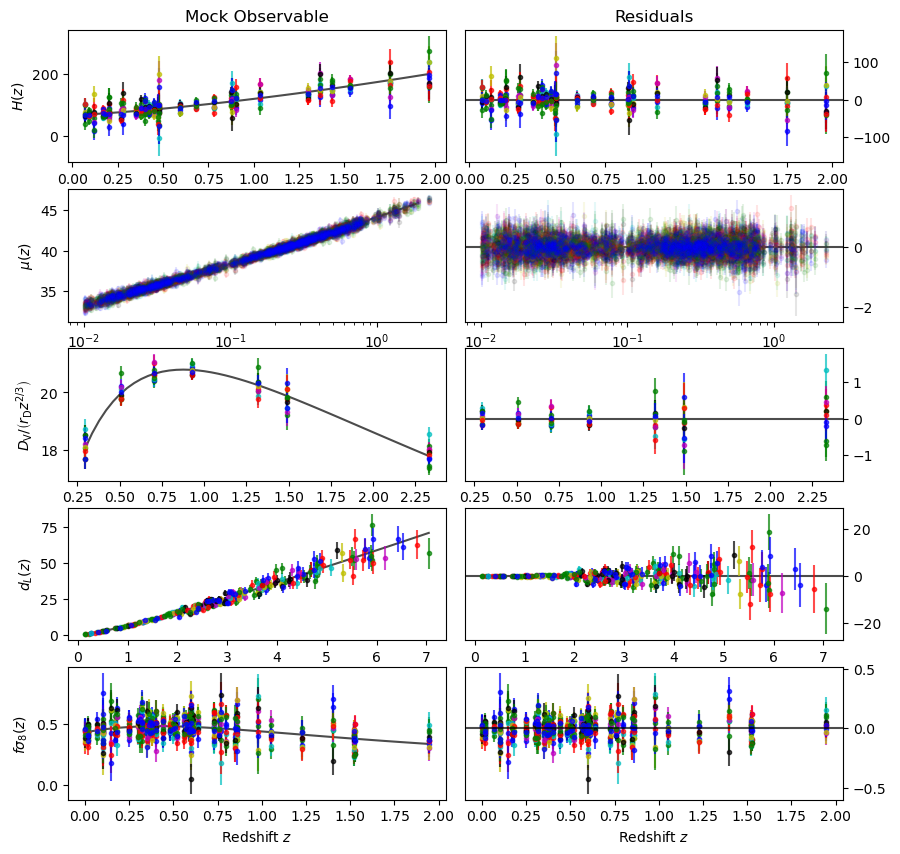

In [7]:
my_cl=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cl.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cl.show_mocks_and_residuals(show_input=True, fmt_train='go', fmt_test='go')
fig.subplots_adjust(wspace=0.05)

# loop with changing seed
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for rs in range(10):
    my_cl_rs=CosmoLearn([H0, Om0, w0, s8], seed=rs)
    my_cl_rs.make_mock(mock_keys=mock_keys)
    color = colors[rs % len(colors)]
    my_cl_rs.show_mocks_and_residuals(ax=ax, fmt_train=f'{color}o', fmt_test=f'{color}o')
plt.show()

## 2. Gaussian Processes and Bayesian Ridge Regression

We demostrate how to reconstruct mock data in `cosmo_learn` using Gaussian Processes (GP) and Bayesian Ridge Regression (BRR). To to so, let's start again with an instance in the reference universe 14000605 and generate mock data:

In [8]:
my_cl=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cl.make_mock(mock_keys=mock_keys)

A GP and BRR can now be trained to reconstruct the training set data by using a single attribute for each method; specifically, `train_gp` and `train_brr`;

In [9]:
my_cl.train_gp()
my_cl.train_brr()

/Users/rechbe/miniconda3/envs/cosmo-learn/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/rechbe/miniconda3/envs/cosmo-learn/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/rechbe/miniconda3/envs/cosmo-learn/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/

This trains individual MLs to each training data set and stores the result in dictionaries that can be accessed as `GP_dict` and `BRR_dict`. Different options such as using a different set of hyperparameters for GP and BRR can also be explored.

As with the generated mock data, the trained MLs can also be shown using a method `show_trained_ml`; by default, this gives 2-sigma reconstructions. The following shows a basic usage;

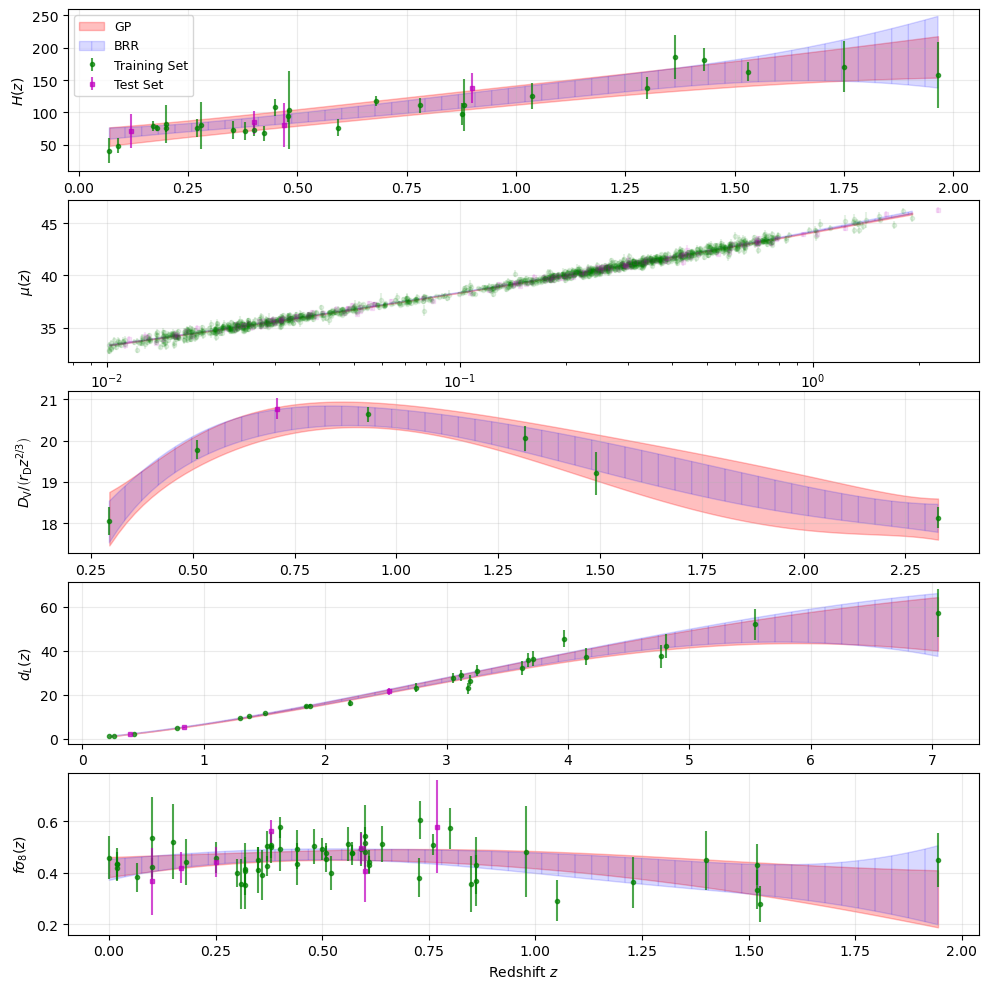

In [10]:
fig, ax=my_cl.show_mocks(show_input=False)
my_cl.show_trained_ml(ax=ax, method='GP', label='GP')
my_cl.show_trained_ml(ax=ax, method='BRR', color='blue', alpha=0.15, hatch='|', label='BRR')

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cl.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

The GP and BRR modules of `cosmo_learn` are based on `scikit-learn` and are using the same default configurations.

## 3. Artificial Neural Networks

Analogously with GP and BRR, we demonstrate cosmological reconstruction in `cosmo_learn` but now with artificial neural networks (ANN). On the reference mock data, the ANN training (based on `ReFANN` and `pytorch`) is shown in the following;

In [11]:
# usual stuff, generate an instance and create mock data
my_cl=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cl.make_mock(mock_keys=mock_keys)

# now here goes ANN training (in 2 lines!)
my_cl.init_ann(show_summary=True)
my_cl.train_ann()

ANN-design for CosmicChronometers
mid node: 4096 hidden layer: 1 hp model: rec_1 loss function: L1Loss() n_epochs: 30000 learning rate: 0.1 minimum learning rate: 1e-08 max batch size: 300

ANN-design for SuperNovae
mid node: 4096 hidden layer: 1 hp model: rec_1 loss function: L1Loss() n_epochs: 30000 learning rate: 0.1 minimum learning rate: 1e-08 max batch size: 300

ANN-design for BaryonAcousticOscillations
mid node: 4096 hidden layer: 1 hp model: rec_1 loss function: L1Loss() n_epochs: 30000 learning rate: 0.1 minimum learning rate: 1e-08 max batch size: 300

ANN-design for BrightSirens
mid node: 4096 hidden layer: 1 hp model: rec_1 loss function: L1Loss() n_epochs: 30000 learning rate: 0.1 minimum learning rate: 1e-08 max batch size: 300

ANN-design for RedshiftSpaceDistorsions
mid node: 4096 hidden layer: 1 hp model: rec_1 loss function: L1Loss() n_epochs: 30000 learning rate: 0.1 minimum learning rate: 1e-08 max batch size: 300

ANN training w/ CosmicChronometers data completed 

This uses the default ANN architecture of `RefANN`.

Options for changing the ANN architecture are possible such as the number of neurons and hidden layers, loss function, optimizer, etc. Defaults of `ReFANN` are utilized in the default `cosmo_learn` options, but users are highly encouraged to play with the setup.

The loss function (post-training) is shown below;

/Users/rechbe/Documents/repos/cosmo_learn/cosmo_learn/cosmo_learn.py:1067: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].set_xlim(1, n_epochs); ax[i].legend(loc='lower left', prop={'size': 10})


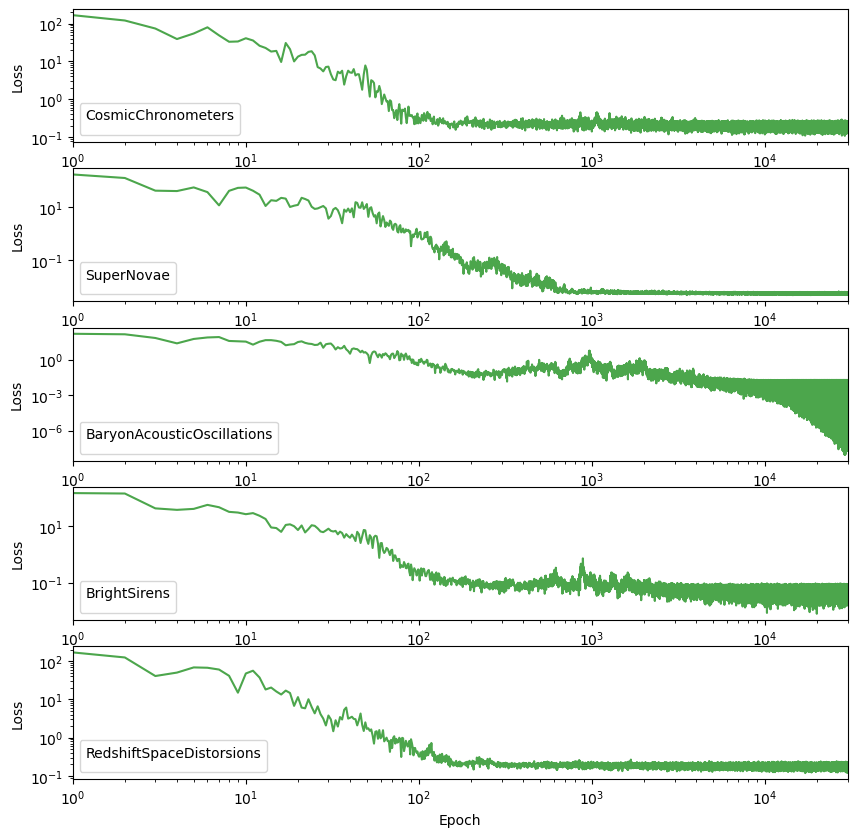

In [12]:
my_cl.show_ann_loss();

The trained ANNs can be directly accessed in the attribute `ANN_dict`; analogous to trained GP's `GP_dict` and BRR's `BR_dict`. Then the ANN reconstruction is shown in the following;

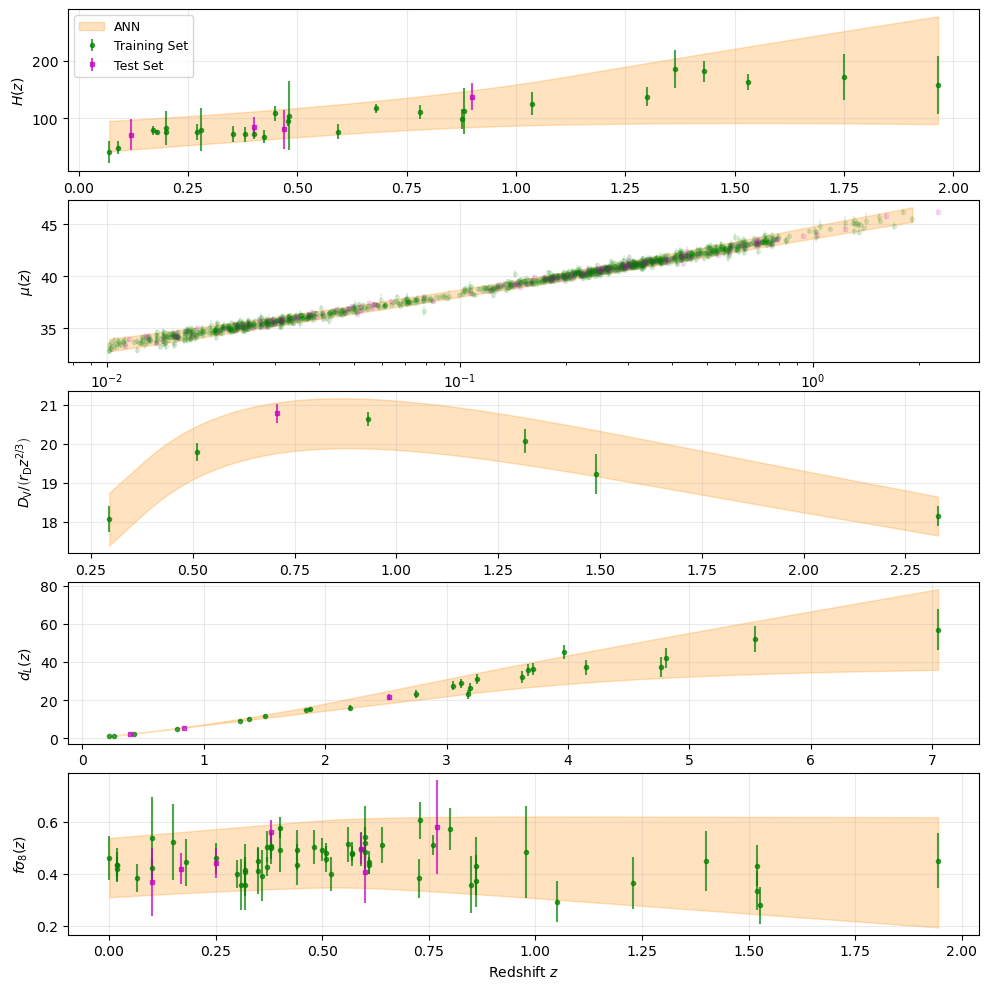

In [13]:
fig, ax=my_cl.show_mocks(show_input=False)
my_cl.show_trained_ml(ax=ax, method='ANN', label='ANN', color='darkorange', alpha=0.25)

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cl.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

## 4. MCMC and GA-Fisher

Lastly we show how MCMC and GA-Fisher inferences of the cosmological parameters and parametric (model-based) reconstructions can be obtained using `cosmo_learn`. Let's start again by generating an instance of mock data in the reference universe;

In [14]:
my_cl=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', 'BrightSirens', 'RedshiftSpaceDistorsions']
my_cl.make_mock(mock_keys=mock_keys)

To perform MCMC, a likelihood is needed. `cosmo_learn` comes with its own `llprob_wcdm` log-likelihood based on $w$CDM. In reality of course one does not know which model best fits the data, but users are encouraged to also created their own likelihood and use it with `cosmo_learn`.

The following shows how the parameters are estimated via MCMC with the built-in $w$CDM likelihood;

In [15]:
# flat priors given to H0, Om0, w0, and s8
prior_dict={'H0_min': 0, 'H0_max': 100, 'Om0_min': 0, 'Om0_max': 1, \
            'w0_min': -10, 'w0_max': 10, 's8_min': 0.2, 's8_max': 1.5}
rd_fid_prior={'mu': 147.46, 'sigma': 0.28} # gaussian prior for the Hubble drag radius

# built-in wCDM likelihood
llprob=lambda x: my_cl.llprob_wcdm(x, prior_dict=prior_dict, rd_fid_prior=rd_fid_prior)

p0=[70, 0.3, -1, 0.8, 147] # a reference starting point for MCMC, arbitrary
nwalkers=15; dres=[0.05, 0.005, 0.01, 0.01, 0.005]; nburn=100; nmcmc=2000 # MCMC parameters
my_cl.get_mcmc_samples(nwalkers, dres, llprob, p0, nburn=nburn, nmcmc=nmcmc);

Optimizing initial position...
... At [ 67.99446543   0.31691585  -1.06242228   0.81521146 147.58038561]
Running MCMC...


100%|██████████| 2000/2000 [00:36<00:00, 55.23it/s]

Done.
Mean acceptance fraction: 0.5534
Total time: 38.07557487487793
MCMC result:
    x[0] = 67.99303254911405 + 0.29839905926445454 - 0.3033883068808194
    x[1] = 0.3180561361302808 + 0.01244273289603004 - 0.013005918466744537
    x[2] = -1.0640752975827872 + 0.06046534747943655 - 0.06645813303005488
    x[3] = 0.8165354897142318 + 0.01439598076598747 - 0.015511059631968194
    x[4] = 147.57058077687287 + 0.26320860844614913 - 0.2768608898091145


Now we show the analogous parameter estimation done using genetic algorithms (GA) used with Fisher matrix approach for uncertainty estimation;

In [16]:
fitness_func=lambda x: -2*llprob(x) # GA fitness function

# flat priors for all parameters
prior_ga=[[prior_dict['H0_min'], prior_dict['H0_max']], [prior_dict['Om0_min'], prior_dict['Om0_max']], \
          [prior_dict['w0_min'], prior_dict['w0_max']], [prior_dict['s8_min'], prior_dict['s8_max']], \
          [rd_fid_prior['mu']-20*rd_fid_prior['sigma'], rd_fid_prior['mu']+20*rd_fid_prior['sigma']]]

# change ga hyperparameters via my_cosmo_learn.ga_params[key]=new_values
# some defaults: 'max_num_iteration'=1000, 'population_size'=100, 'mutation_probability'=0.3
my_cl.get_gaFisher_samples(fitness_func, prior_ga, llprob=llprob, nsamples=(nmcmc-nburn)*nwalkers);

|||||||||||_______________________________________ 21.4% GA is running...

/Users/rechbe/miniconda3/envs/cosmo-learn/lib/python3.10/site-packages/geneticalgorithm/geneticalgorithm.py:353: RuntimeWarning: invalid value encountered in subtract
  normobj=maxnorm-normobj+1


 The best solution found:                                                                           
 [ 68.03794721   0.31383572  -1.05346782   0.81124668 147.58476325]

 Objective function:
 1508.459273177438

GA-Fisher result:
    x[0] = 68.03956495799169 + 0.28846141626100064 - 0.28677559780290096
    x[1] = 0.3139452474078509 + 0.013085476895772774 - 0.013116356107046756
    x[2] = -1.0545582942221499 + 0.061036967683470555 - 0.06060201897809425
    x[3] = 0.8112787512470734 + 0.015282202893590058 - 0.01520518333626153
    x[4] = 147.58789427749525 + 0.2695388114003947 - 0.2714598322415043


The estimated parameters can be visualized in a contour/triangle plot using a method `show_param_posterior` that utilizes the package `corner`. This is used as follows;

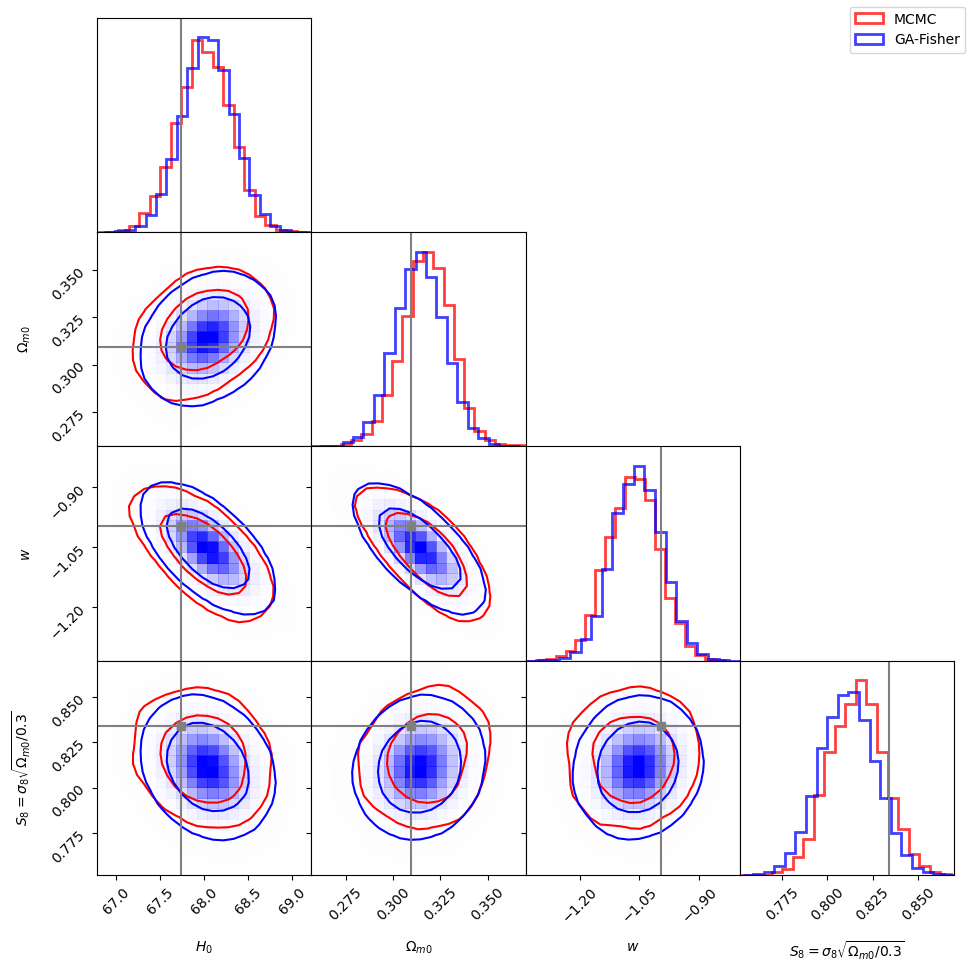

In [17]:
corner_plot = my_cl.show_param_posterior(method='MCMC')
my_cl.show_param_posterior(method='GAFisher', fig=corner_plot, color='blue', show_truth=True)

corner_plot.legend(['MCMC', 'GA-Fisher'], loc='upper right')
corner_plot.tight_layout(); corner_plot.subplots_adjust(hspace=0, wspace=0)
plt.show()

Lastly, as with GP, BRR and ANN, the sampled parameters based on a parametric model (hypothesis) can be used to parametrically reconstruct the data set or visualize the best fit. A method `show_bestfit_curve` is readily available for this purpose and is used below for illustration;

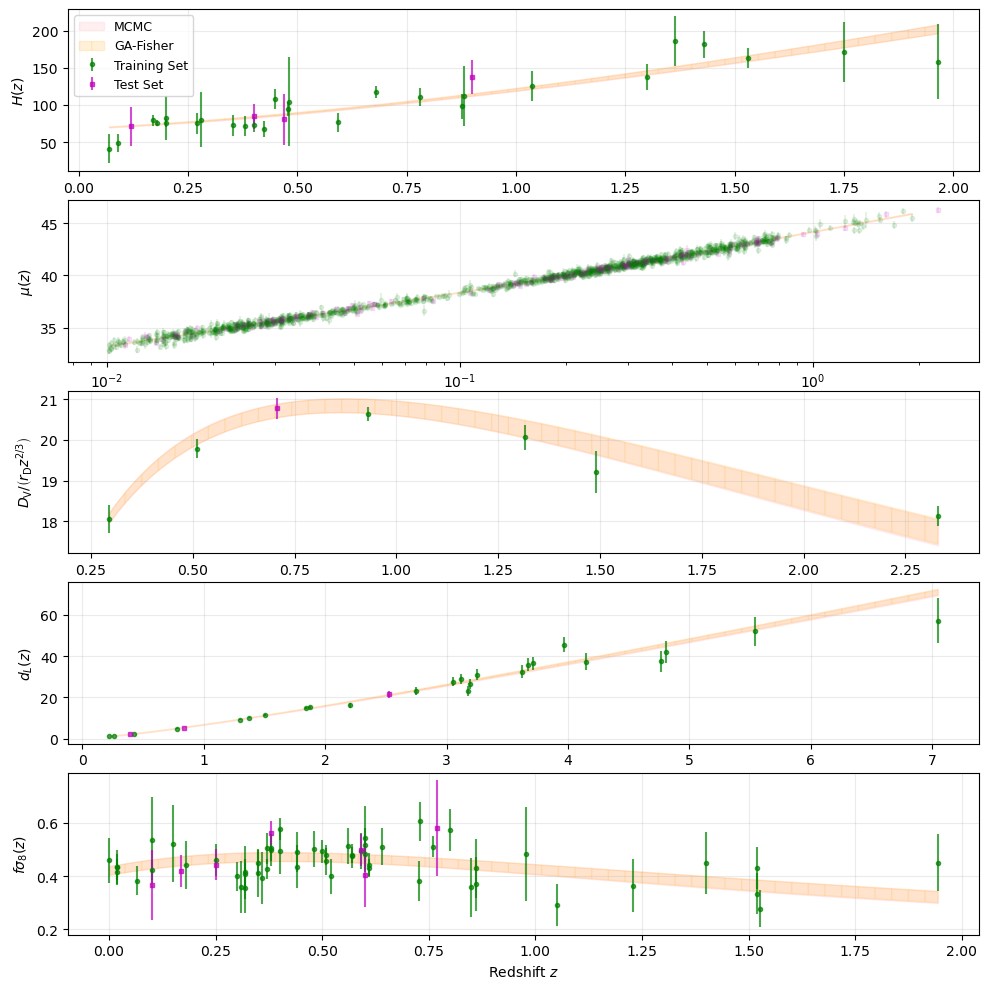

In [18]:
fig, ax=my_cl.show_mocks(show_input=False)
my_cl.show_bestfit_curve(ax=ax, method='MCMC', label='MCMC', color='pink')
my_cl.show_bestfit_curve(ax=ax, method='GAFisher', color='orange', alpha=0.15, hatch='|', label='GA-Fisher')

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cl.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

End of notebook